Solution took 0.001 sec
[     0. -10000.      0.      0. -10000.      0.]


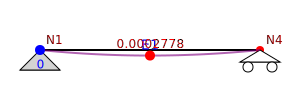

In [8]:
import sys
sys.path.append("..")

from flip import (
    Domain, Solver,
    Material, CrossSection, Node, Beam2D, DofID,
    UniformDistributedLoad,
    plot_model_drawsvg, plot_model_diagram,
)


# solver
sol = Solver()
dom = sol.domain

# material and section
mat = Material("C30", e=30e9, g=12e9)
cs = CrossSection("rect", a=0.3*0.5, iy=0.3*0.5**3/12, k=1.0e32, rho=25e3)
dom.add_material(mat)
dom.add_cs(cs)

# nodes
n1 = Node(1, dom, coords=[0.0, 0.0, 0.0], bcs=[DofID.Dx, DofID.Dz])
#n2 = Node(2, dom, coords=[0.0, 0.0, -5.0])
#n3 = Node(3, dom, coords=[5.0, 0.0, -5.0])
n4 = Node(4, dom, coords=[5.0, 0.0, 0.0], bcs=[DofID.Dz]) #, lcs={"lx": [0.8660254037844387, 0.0, -0.5], "ly": [0.0, 1.0, 0.0]})
dom.add_node(n1)
#dom.add_node(n2)
#dom.add_node(n3)
dom.add_node(n4)

# element
e1 = Beam2D(1, dom, nodes=[1, 4], mat="C30", cs="rect", hinges=(False, False))
#e2 = Beam2D(2, dom, nodes=[2, 3], mat="C30", cs="rect", hinges=(False, False))
#e3 = Beam2D(3, dom, nodes=[3, 4], mat="C30", cs="rect", hinges=(False, False))
dom.add_element(e1)
#dom.add_element(e2)
#dom.add_element(e3)

# loads
udl = UniformDistributedLoad(fz=4000.0)  # N/m
dom.apply_element_load(1, udl)

# solve
sol.solve()
print (e1._end_forces_local())

# SVG outputs
plot_model_drawsvg(dom, "simple_beam_model.svg", width_px=300, height_px=100, show_deformed=True, deform_scale=8000)
#plot_model_diagram(dom, "V", "simple_beam_shear.svg")



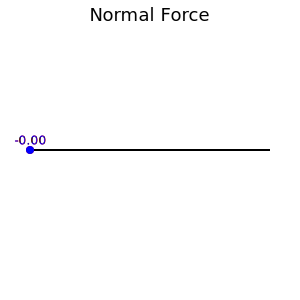

In [10]:
plot_model_diagram(dom, "N", "simple_beam_moment.svg", scale=0.003, width_px=300, height_px=300, margin=30)


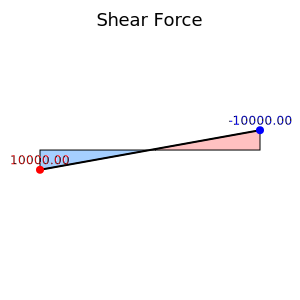

In [3]:
plot_model_diagram(dom, "V", "simple_beam_moment.svg", scale=0.002, width_px=300, height_px=300)

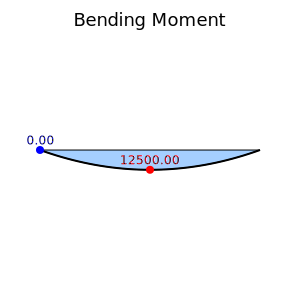

In [4]:
plot_model_diagram(dom, "M", "simple_beam_moment.svg", scale=0.002, width_px=300, height_px=300)